# Jupiter: CIRS nadir-viewing thermal emission

In this example, we show how NemesisPy can be used to calculate forward models for a nadir-viewing observation. In particular, we are going to model Jupiter's thermal emission using instrument specifications relevant for the Composite Infrared Spectrometer (CIRS) on Cassini. 

First of all, we show how all the input files can be read at once, and summarise the content of these files. Then, we will show how the forward models can be easily computed in python.

In [1]:
from NemesisPy import *

## Input files

NemesisPy includes the *read_input_files()* function, which automatically reads all input files and stores the information in the reference classes. Here, we explore some of the most important characteristics of this particular forward model.

In [2]:
runname = 'cirstest'

#Reading the input files
Atmosphere,Measurement,Spectroscopy,Scatter,Stellar,Surface,CIA,Layer,Variables = read_input_files(runname)

### Atmosphere

The profiles in this example were identified as standard for CIRS data analysis.

- Temperature, pressure and altitude levels provided by Glenn Orton assuming *g* = 24 m s$^{-2}$.
- Ammonia assumed to be constant in the troposphere, limited by the saturation vapour pressure between 0.5-0.6 bar. Above this level, its abundance drops according to Fouchet et al. (1999). 
- Phosphine is the standard NIMS case.
- Hydrocarbons (including CH$_4$) from Romani note to CIRS team (7 May 1999) with deep CH$_4$ nudged to GPMS results.
- H$_2$ and He from Galileo entry probe.
- $^{13}$CH$_4$ (2) scaled from $^{12}$CH$_4$ (1) assuming terrestrial relative abundances.
- $^{12}$CH$_3$D (3) also scaled from $^{12}$CH$_4$ (1) but using $^{12}$CH$_3$D/$^{12}$CH$_4$ = 8 $\times$ 10$^{-5}$.

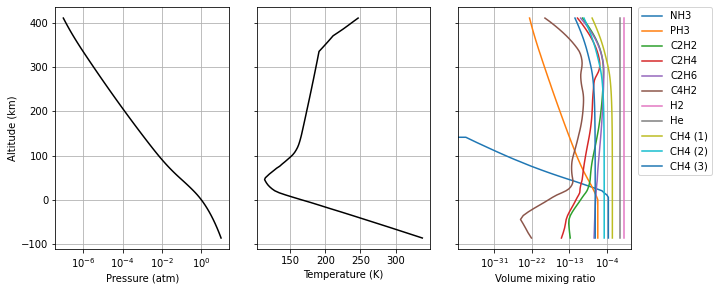

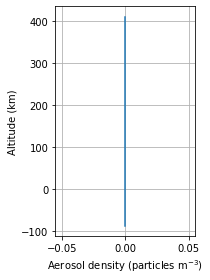

In [3]:
Atmosphere.plot_Atm()
Atmosphere.plot_Dust()

### Measurement

In this example, as we only want to model the spectrum, the information about the measured spectra is not relevant. However, the *.spx* file also defines the geometry of the observations and the spectral range and resolution to use.

The spectral range in this example goes from 5-1399 cm$^{-1}$. The *FWHM* of the instrument function is set to 0, which means that it is accounted for directly in the k-tables. In this simple example, all relevant angles were assumed to be zero. 

In [4]:
Measurement.summary_info()

Spectral resolution of the measurement is account for in the k-tables
Field-of-view centered at ::  Latitude 0.0 - Longitude 0.0
There are  1 geometries in the measurement vector

GEOMETRY 1
Minimum wavelength/wavenumber ::  5.0  - Maximum wavelength/wavenumber ::  1399.0
Nadir-viewing geometry. Latitude ::  0.0  - Longitude ::  0.0  - Emission angle ::  0.0  - Solar Zenith Angle ::  0.0  - Azimuth angle ::  0.0


### Variables

In this example, we choose a parameterisation that allows us to define the temperature in each altitude level. In particular, we choose the model parameterisation #0, which allows the definition of a continuous vertical profile.

In [5]:
print('VARIDENT')
print(Variables.VARIDENT)
print('')

print('Temperature in each altitude level')
print(Variables.XA)
print('')

VARIDENT
[[0 0 0]]

Temperature in each altitude level
[328.16 305.63 284.53 264.74 246.16 228.71 212.31 196.9  182.41 168.83
 156.1  144.21 133.41 124.3  117.86 113.89 110.75 108.25 106.26 104.68
 103.4  104.5  107.3  110.1  113.5  117.   120.5  125.   128.5  132.4
 136.   139.8  143.4  146.2  148.4  150.3  151.8  153.   154.1  155.1
 156.   156.83 157.66 158.49 159.32 160.15 160.98 161.81 162.64 163.47
 164.3  165.14 165.98 166.82 167.66 168.5  169.34 170.18 171.02 171.86
 172.7  173.53 174.36 175.19 176.02 176.85 177.68 178.51 179.34 180.17
 181.   185.   189.   193.   197.   201.   208.13 215.27 222.4  229.53
 236.67]



### Spectroscopy

In this example, we do not include the k-tables in the current working directory because of storage limitations, although these are available upon request.

Here, we include several radiatively active gases: C$_2$H$_2$, C$_2$H$_6$, $^{12}$CH$_4$, $^{13}$CH$_4$, $^{12}$CH$_3$D, PH$_3$ and NH$_3$.

The *FWHM* of the instrument function was included in the calculation of the k-tables, being 2.5 cm$^{-1}$. 

In [6]:
Spectroscopy.summary_info()

Calculation type ILBL ::  0  (k-distribution)
Number of radiatively-active gaseous species ::  7
Gaseous species ::  ['C2H2', 'C2H6', 'CH4 (1)', 'CH4 (2)', 'CH4 (3)', 'PH3', 'NH3']
Number of g-ordinates ::  20
Number of spectral points ::  1395
Wavelength range ::  5.0 - 1399.0
Step size ::  1.0
Spectral resolution of the k-tables (FWHM) ::  2.5
Number of temperature levels ::  15
Temperature range ::  70.0 - 300.0 K
Number of pressure levels ::  20
Pressure range ::  3.0590232e-07 - 7.3890543 atm


## Running a foward model

After having read the input files and explored some of the most relevant parameters, we can easily perform a forward model.There are two main ways of doing this:

- Since all NEMESIS input files are present in the working directory, the forward model could be performed using the nemesisPY.py program from the command window. This is the main program for running a general retrieval, but if *NITER* = -1 in the *.inp* file, then a forward model is calculated, not a retrieval. After running the program, the forward model will be stored in the *.mre* file.

- The forward model can be calculated in python using the Forward Model class. In particular, we will use the *nemesisfm()*, which is the most general version of the forward model. After running this function, the forward model will be stored as an array.

Here, we use the second approach.

In [7]:
ForwardModel = ForwardModel_0(runname=runname, Atmosphere=Atmosphere,Surface=Surface,Measurement=Measurement,Spectroscopy=Spectroscopy,Stellar=Stellar,Scatter=Scatter,CIA=CIA,Layer=Layer,Variables=Variables)

SPECONV = ForwardModel.nemesisfm()

Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT


/home/juanalday/Documents/Projects/NemesisPy-dist/NemesisPy/Radtrans/ForwardModel_0.py:2974: RuntimeWarning: divide by zero encountered in log
  f = interpolate.interp1d(Scatter.WAVE,np.log(Scatter.KEXT[:,i]))
/home/juanalday/Documents/Projects/NemesisPy-dist/NemesisPy/Radtrans/ForwardModel_0.py:2976: RuntimeWarning: divide by zero encountered in log
  f = interpolate.interp1d(Scatter.WAVE,np.log(Scatter.KSCA[:,i]))


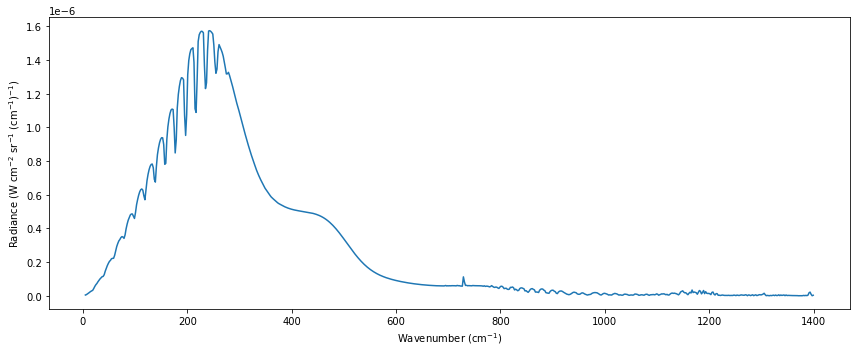

In [8]:
fig,ax1 = plt.subplots(1,1,figsize=(12,5))

ax1.plot(Measurement.VCONV[:,0],SPECONV[:,0])
ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
ax1.set_ylabel('Radiance (W cm$^{-2}$ sr$^{-1}$ (cm$^{-1}$)$^{-1}$)')
plt.tight_layout()

### Validating the forward model against NEMESIS

In order to test the radiative transfer calculations in NemesisPy, we compare the computed forward model with the analogous from NEMESIS (i.e., Fortran version). 

Because of historical reasons, the values of the spectra in the *.mre* file are multiplied by 10$^9$ (i.e., nW cm$^{-2}$ sr$^{-1}$ (cm$^{-1}$)$^{-1}$), which needs to be accounted for when comparing the values with the forward model computed with the *nemesisfm()* function in NemesisPy.

This comparison shows that both versions of the NEMESIS code agree to less than 0.5%. 

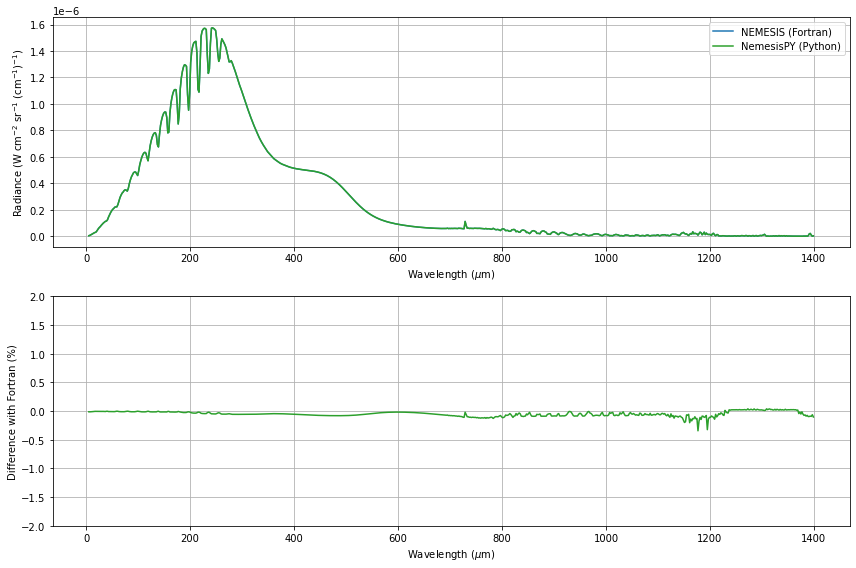

In [9]:
#Reading .mre file computed with the fortran version
lat,lon,ngeom,ny,wave1,specret1,specmeas,specerrmeas,nx,Var,aprprof,aprerr,retprof,reterr = read_mre('cirstest_fortran')
specret1 = specret1 * 1.0e-9

#Making summary plot
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,8))

ax1.plot(wave1,specret1,label='NEMESIS (Fortran)')
ax1.plot(Measurement.VCONV[:,0],SPECONV[:,0],label='NemesisPY (Python)',c='tab:green')
ax2.plot(wave1,(specret1[:,0]-SPECONV[:,0])/SPECONV[:,0]*100.,c='tab:green')
ax2.set_ylim(-2.,2.)
ax1.grid()
ax2.grid()
ax1.legend()
ax1.set_xlabel('Wavelength ($\mu$m)')
ax2.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Radiance (W cm$^{-2}$ sr$^{-1}$ (cm$^{-1}$)$^{-1}$)')
ax2.set_ylabel('Difference with Fortran (%)')
plt.tight_layout()

### Calculating the jacobian matrix

Similarly, apart from the forward model, NemesisPy allows the calculation of the jacobian matrix, which includes information about the sensitivity of the spectrum to each of the parameters in the state vector. These calculations are also easily performed using the Forward Model class using the *jacobian_nemesis()* function. In particular, all the parameters included in the state vector for this particular example can be calculated analytically, although in some cases the derivatives have to be calculated numerically. The output of this function is the modelled measurement vector (i.e., modelled spectrum, since there is only one geometry in this example), and the jacobian matrix (i.e., derivative of the modelled spectrum with respect to the elements of the state vector, which represent the temperature at different altitude/pressure levels). 

In [10]:
YN,KK = ForwardModel.jacobian_nemesis()

Calculating analytical part of the Jacobian :: Calling nemesisSOfmg 
Warning from layer_split() :: LAYHT < H(0). Resetting LAYHT
CIRSradg :: Calculating CIA opacity
CIRSradg :: Calculating DUST opacity
CIRSradg :: Calculating GAS opacity


/home/juanalday/Documents/Projects/NemesisPy-dist/NemesisPy/Radtrans/ForwardModel_0.py:2974: RuntimeWarning: divide by zero encountered in log
  f = interpolate.interp1d(Scatter.WAVE,np.log(Scatter.KEXT[:,i]))
/home/juanalday/Documents/Projects/NemesisPy-dist/NemesisPy/Radtrans/ForwardModel_0.py:2976: RuntimeWarning: divide by zero encountered in log
  f = interpolate.interp1d(Scatter.WAVE,np.log(Scatter.KSCA[:,i]))


CIRSradg :: Calculating TOTAL opacity
CIRSradg :: Calculating TOTAL line-of-sight opacity
CIRSradg :: Integrading over g-ordinates
Mapping gradients from Layer to Profile
Mapping gradients from Profile to State Vector
Calculating numerical part of the Jacobian :: running 0 forward models 


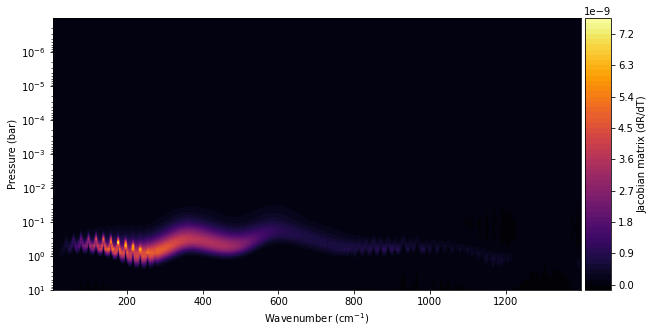

In [11]:
#Plotting the Jacobian matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,ax1 = plt.subplots(1,1,figsize=(10,5))
im1 = ax1.contourf(Measurement.VCONV[:,0],Atmosphere.P/1.0e5,np.transpose(KK),levels=51,cmap='inferno')
ax1.set_ylim(Atmosphere.P.max()/1.0e5,Atmosphere.P.min()/1.0e5)
ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
ax1.set_ylabel('Pressure (bar)')
ax1.set_yscale('log')

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im1, cax=cax)
cbar.set_label('Jacobian matrix (dR/dT)')